In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker, cm

In [2]:
def fv_0(E,Lfm):
    L = Lfm/0.197
    geom = np.exp(-E*L)/(1.-np.exp(-E*L))
    d0 = -1.*(L**2/(4.*E) + L/E**2 + 2/E**3) * np.exp(-0.5*E*L)
    d1 = geom*(np.exp(0.5*E*L)*(-L**2/(4.*E)+L/E**2-2./E**3)+2./E**3)
    d2 = geom*(np.exp(-0.5*E*L)*(L**2/(4.*E)+L/E**2+2./E**3)-2./E**3)
    d = d0-d1-d2
    gs = -2./E**3
    return E,Lfm,d/gs*100

def fv_n(E,Lfm,n):
    L = Lfm/0.197
    k = 2.*np.pi*n/L # GeV
    geom = np.exp(-E*L)/(1.-np.exp(-E*L))
    d0 = np.exp(-0.5*E*L)/(2.*(E**2+k**2)**2) * (-1)**n * (E**2*L+k**2*L+4*E)
    d1 = geom/(2.*(E**2+k**2)**2) * (-1)**n * np.exp(0.5*E*L) * (E**2*L+k**2*L-4*E)
    d2 = geom/(2.*(E**2+k**2)**2) * (-1)**n * np.exp(-0.5*E*L) * (E**2*L*k**2*L+4*E)
    d = d0-d1-d2
    gs = -2./(E**2+k**2)**2
    return E,Lfm,d/gs*100

In [3]:
E = np.linspace(0.1,1.0,101) # GeV
L = np.linspace(15.0,2.0,101) # fm

relerr = []
xlist = []
ylist = []
for e in E:
    t1 = []
    t2 = []
    t3 = []
    for l in L:
        energy,boxsize,correction = fv_0(e,l)
        t1.append(correction)
        t2.append(energy)
        t3.append(boxsize)
    relerr.append(t1)
    xlist.append(t2)
    ylist.append(t3)
relerr = np.array(relerr)
xlist = np.array(xlist)
ylist = np.array(ylist)

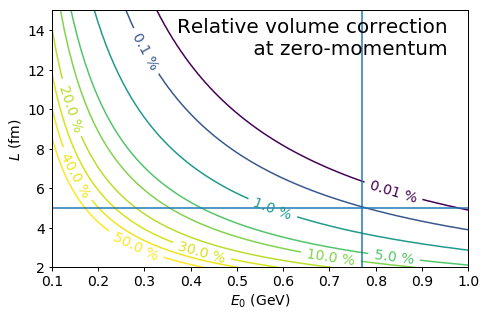

In [4]:
# plot params
ms = '6'
cs = 6
fs_l = 14
fs_xy = 14
ts = 14
lw = 1

#relerr = relerr[:,::-1]
tskip = 1
plt_axes = [0.14,0.14,0.825,0.825]
figsize = (3.50394*2,2*2.1655535534)
#figsize = (3.50394*2,3.50394*2)
fig = plt.figure('relerr',figsize=figsize)
ax = plt.axes(plt_axes)
#lev_exp = np.arange(np.floor(np.log10(relerr.min())-1),
#                    np.ceil(np.log10(relerr.max())+1))
#levs = np.power(10, lev_exp)
#plt.contourf(xlist,ylist,relerr, levs, norm=colors.LogNorm())

class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()

CS = ax.contour(xlist,ylist,relerr,levels=[0.01,0.1,1,5,10,20,30,40,50],locator=ticker.LogLocator())

CS.levels = [nf(val) for val in CS.levels]
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%.4s \%%'
else:
    fmt = '%.4s %%'
    
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=fs_xy)

#plt.colorbar()
#ax.set_xticks(np.arange(len(E))[::tskip])
#ax.set_yticks(np.arange(len(L))[::tskip])
#ax.set_xticklabels(['%2.3s' %i for i in E[::tskip]])
#ax.set_yticklabels(['%2.4s' %i for i in L[::tskip]])
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")
ax.set_ylabel('$L$ (fm)', fontsize=fs_xy)
ax.set_xlabel('$E_0$ (GeV)', fontsize=fs_xy)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
ax.axhline(5)
ax.axvline(0.77)
#for i in range(len(E)):
#    for j in range(len(L)):
#        text = ax.text(i, j, '%.4s' %relerr[i, j],
#                       ha="center", va="center", color="w")
ax.set_title("Relative volume correction\n at zero-momentum",fontdict={'fontsize':20,'verticalalignment':'top','horizontalalignment':'right'},x=0.95,y=0.95)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('../figures/fv_relerr_0mom.pdf', transparent=True)

In [5]:
E = np.linspace(0.1,1.0,101) # GeV
L = np.linspace(15.0,2.0,101) # fm
N = [1]

mom = dict()
for n in N:
    mom[n] = dict()
    relerr = []
    xlist = []
    ylist = []
    for e in E:
        t1 = []
        t2 = []
        t3 = []
        for l in L:
            energy,boxsize,correction = fv_n(e,l,n)
            t1.append(correction)
            t2.append(energy)
            t3.append(boxsize)
        relerr.append(t1)
        xlist.append(t2)
        ylist.append(t3)
    mom[n]['relerr'] = np.array(relerr)
    mom[n]['xlist'] = np.array(xlist)
    mom[n]['ylist'] = np.array(ylist)

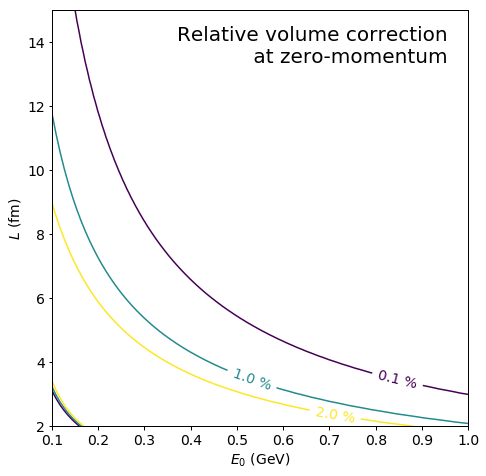

In [6]:
# plot params
ms = '6'
cs = 6
fs_l = 14
fs_xy = 14
ts = 14
lw = 1

#relerr = relerr[:,::-1]
tskip = 1
plt_axes = [0.14,0.14,0.825,0.825]
#figsize = (3.50394*2,2*2.1655535534)
figsize = (3.50394*2,3.50394*2)
fig = plt.figure('relerr',figsize=figsize)
ax = plt.axes(plt_axes)
#lev_exp = np.arange(np.floor(np.log10(relerr.min())-1),
#                    np.ceil(np.log10(relerr.max())+1))
#levs = np.power(10, lev_exp)
#plt.contourf(xlist,ylist,relerr, levs, norm=colors.LogNorm())

class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()

for n in N:
    xlist = mom[n]['xlist']
    ylist = mom[n]['ylist']
    relerr = mom[n]['relerr']
    CS = ax.contour(xlist,ylist,relerr,levels=[0.1,1,2]) #,locator=ticker.LogLocator())

    CS.levels = [nf(val) for val in CS.levels]
    # Label levels with specially formatted floats
    if plt.rcParams["text.usetex"]:
        fmt = r'%.4s \%%'
    else:
        fmt = '%.4s %%'
    
    #fmt = {}
    #print(n)
    #for l, s in zip(CS.levels, [str(n)]):
    #    fmt[l]=s
    #    print(fmt)
    
    ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=fs_xy)

#plt.colorbar()
#ax.set_xticks(np.arange(len(E))[::tskip])
#ax.set_yticks(np.arange(len(L))[::tskip])
#ax.set_xticklabels(['%2.3s' %i for i in E[::tskip]])
#ax.set_yticklabels(['%2.4s' %i for i in L[::tskip]])
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")
ax.set_ylabel('$L$ (fm)', fontsize=fs_xy)
ax.set_xlabel('$E_0$ (GeV)', fontsize=fs_xy)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
#for i in range(len(E)):
#    for j in range(len(L)):
#        text = ax.text(i, j, '%.4s' %relerr[i, j],
#                       ha="center", va="center", color="w")
ax.set_title("Relative volume correction\n at zero-momentum",fontdict={'fontsize':20,'verticalalignment':'top','horizontalalignment':'right'},x=0.95,y=0.95)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()